# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 6
<p>Regresión Lineal, Regresión Logística y kNN.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import random

# Seleccion de caracteristicas
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Climate Model Simulation Crashes*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Realiza un conteo de las clases y analiza si hay desequilibrio.
- Segmenta el conjunto de datos en entrenamiento y test.
- Normaliza las variables de entrada numéricas.
- Evalua el rendimiento de los modelos de Regresión Logística y k-Nearest Neigbours utilizando la métrica que consideres más adecuada.
- Utilizando el error de entrenamiento y test, busca el valor óptimo de k. Recoge en una gráfica la evolución de los mismos. Los valores de k estarán en el eje de abscisas y los de los errores en el de ordenadas.


***Fuente:*** *https://archive-beta.ics.uci.edu/ml/datasets/climate+model+simulation+crashes*

In [3]:
# Carga del dataset
# sep='\s+' -> Separador de datos por diferente longitud de espacios en blanco
df=read_csv('pop_failures.dat', sep="\s+", engine='python')

# Representación de los datos
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


<div style="font-size:14px; text-align:justify"><b>1: </b>Realiza un conteo de las clases y analiza si hay desequilibrio.</div>

Para el análisis de la distribución de los datos, basta con la agrupación de las instancias en base a la característica a la que pertenecen y más adelante valorar el posible desbalanceo o no.

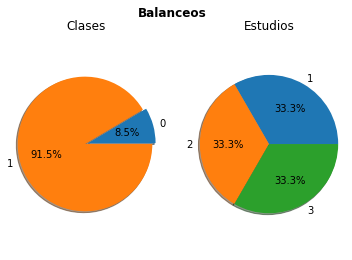

In [4]:
# Agrupación de la columna deseada
outcome_distribution=df.groupby('outcome').size()
study_distribution=df.groupby('Study').size()

# Ploteo de los datos
labels = [df['outcome'].unique(), df['Study'].unique()]
sizes = [outcome_distribution, study_distribution]
explode = (0, 0.05)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].pie(sizes[0], explode=explode, labels=labels[0], autopct='%1.1f%%', shadow=True)
axes[1].pie(sizes[1], labels=labels[1], autopct='%1.1f%%', shadow=True)

axes[0].axis('equal')
axes[1].axis('equal')

axes[0].set_title('Clases')
axes[1].set_title('Estudios')
fig.suptitle('Balanceos', fontweight='bold')

plt.show()

Para el caso de estudio, se trata de un dataset desbalanceado, ya que el 92% de las instancias hacen referencia a la clase "1".<br>
Por otro lado, dado que existe determinadas clases de estudios, se realiza el balanceo de los mismos, y para este caso, observamos que están completamente balanceados ya que existe 3 tipos de estudios y existe 1/3 de instancias para cada tipo de estudio.

<div style="font-size:14px; text-align:justify"><b>2: </b>Segmenta el conjunto de datos en entrenamiento y test.</div>

In [5]:
# Separación en datos de entrada y salida del dataframe
X=df[df.columns[:-1]]
y=df[df.columns[-1:]]

# Separacion train y test
seed = random.randint(0,42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
display(X_train, y_train)
print(f'''\n Numero de instancias almacenadas para test: {len(X)-len(X_train)}''')

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
159,1,160,0.710191,0.080214,0.404242,0.647360,0.915713,0.154440,0.614667,0.329726,0.279505,0.488782,0.680231,0.820551,0.740144,0.402157,0.921411,0.199700,0.015783,0.076074
142,1,143,0.751171,0.055183,0.876063,0.031708,0.953696,0.115376,0.358328,0.855212,0.233656,0.938578,0.759927,0.605522,0.242320,0.495308,0.782511,0.778073,0.144095,0.013249
79,1,80,0.644259,0.969022,0.815632,0.561210,0.778106,0.454347,0.918361,0.809918,0.254702,0.419313,0.780902,0.015305,0.432229,0.772509,0.522024,0.077207,0.172865,0.847359
457,3,98,0.804595,0.362367,0.115899,0.580326,0.323671,0.973989,0.860429,0.588071,0.958180,0.218349,0.915916,0.379448,0.736204,0.830642,0.455938,0.470280,0.729021,0.240821
64,1,65,0.467026,0.447649,0.565571,0.361594,0.652016,0.801630,0.750647,0.955125,0.534233,0.875553,0.444225,0.128868,0.907614,0.358759,0.895476,0.755525,0.764245,0.778632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2,134,0.815117,0.587942,0.562619,0.271723,0.761360,0.232417,0.638037,0.201023,0.982215,0.370801,0.849556,0.332243,0.589064,0.483082,0.227573,0.002749,0.679975,0.516867
406,3,47,0.965188,0.043445,0.755648,0.235055,0.708973,0.074265,0.669674,0.292062,0.389558,0.985263,0.941492,0.816325,0.608544,0.209885,0.134386,0.325439,0.605271,0.983264
390,3,31,0.721518,0.764430,0.847149,0.051406,0.649740,0.235101,0.231772,0.314433,0.816677,0.176789,0.109672,0.490705,0.146894,0.469455,0.433923,0.645516,0.650624,0.959569
143,1,144,0.423552,0.408844,0.849579,0.489168,0.033935,0.240871,0.349480,0.795265,0.140854,0.039552,0.808244,0.928896,0.305014,0.909720,0.795870,0.331507,0.919558,0.505578


,outcome
159,1
142,1
79,1
457,1
64,1
...,...
313,1
406,1
390,1
143,1



 Numero de instancias almacenadas para test: 179


<div style="font-size:14px; text-align:justify"><b>3: </b>Normaliza las variables de entrada numéricas.</div>

Previo a ello, se decide eliminar la columna **Study** y **Run** ya que no aportan información al conjunto de datos, únicamente son identificadores de los datos tomados.

In [6]:
# Escoger todas las columnas salvo las dos primeras
X_train=X_train[X_train.columns[2:]]
X_train

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
159,0.710191,0.080214,0.404242,0.647360,0.915713,0.154440,0.614667,0.329726,0.279505,0.488782,0.680231,0.820551,0.740144,0.402157,0.921411,0.199700,0.015783,0.076074
142,0.751171,0.055183,0.876063,0.031708,0.953696,0.115376,0.358328,0.855212,0.233656,0.938578,0.759927,0.605522,0.242320,0.495308,0.782511,0.778073,0.144095,0.013249
79,0.644259,0.969022,0.815632,0.561210,0.778106,0.454347,0.918361,0.809918,0.254702,0.419313,0.780902,0.015305,0.432229,0.772509,0.522024,0.077207,0.172865,0.847359
457,0.804595,0.362367,0.115899,0.580326,0.323671,0.973989,0.860429,0.588071,0.958180,0.218349,0.915916,0.379448,0.736204,0.830642,0.455938,0.470280,0.729021,0.240821
64,0.467026,0.447649,0.565571,0.361594,0.652016,0.801630,0.750647,0.955125,0.534233,0.875553,0.444225,0.128868,0.907614,0.358759,0.895476,0.755525,0.764245,0.778632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.815117,0.587942,0.562619,0.271723,0.761360,0.232417,0.638037,0.201023,0.982215,0.370801,0.849556,0.332243,0.589064,0.483082,0.227573,0.002749,0.679975,0.516867
406,0.965188,0.043445,0.755648,0.235055,0.708973,0.074265,0.669674,0.292062,0.389558,0.985263,0.941492,0.816325,0.608544,0.209885,0.134386,0.325439,0.605271,0.983264
390,0.721518,0.764430,0.847149,0.051406,0.649740,0.235101,0.231772,0.314433,0.816677,0.176789,0.109672,0.490705,0.146894,0.469455,0.433923,0.645516,0.650624,0.959569
143,0.423552,0.408844,0.849579,0.489168,0.033935,0.240871,0.349480,0.795265,0.140854,0.039552,0.808244,0.928896,0.305014,0.909720,0.795870,0.331507,0.919558,0.505578


In [7]:
# Instancia MinMaxScaler
minmaxSc = MinMaxScaler(feature_range=(0, 1))
minmaxSc.fit(X_train)

# Resultado y nombre columnas
data=minmaxSc.transform(X_train)
names=minmaxSc.get_feature_names_out()

# Datos minimo y máximo por cada columna
minimo=minmaxSc.data_min_
maximo=minmaxSc.data_max_

X_normalized=DataFrame(data=data, columns=names)
X_normalized

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,0.710401,0.078536,0.404652,0.649349,0.916348,0.154480,0.613549,0.330021,0.277959,0.487977,0.680111,0.822216,0.741645,0.400736,0.922133,0.199533,0.015384,0.075858
1,0.751465,0.053427,0.878335,0.026520,0.954524,0.115285,0.355752,0.856449,0.231830,0.938890,0.759851,0.606438,0.241925,0.494140,0.783014,0.780011,0.144255,0.012994
2,0.644333,0.970114,0.817666,0.562194,0.778045,0.455389,0.918972,0.811074,0.253004,0.418335,0.780838,0.014166,0.432558,0.772095,0.522115,0.076594,0.173150,0.847612
3,0.805000,0.361568,0.115171,0.581534,0.321314,0.976770,0.860711,0.588829,0.960771,0.216872,0.915927,0.379578,0.737690,0.830387,0.455925,0.471098,0.731729,0.240705
4,0.466734,0.447116,0.566618,0.360251,0.651318,0.803834,0.750304,0.956541,0.534239,0.875709,0.443974,0.128125,0.909754,0.357220,0.896157,0.757380,0.767107,0.778842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.815543,0.587847,0.563654,0.269333,0.761215,0.232717,0.637053,0.201087,0.984952,0.369703,0.849531,0.332208,0.589990,0.481881,0.227199,0.001865,0.682470,0.516919
357,0.965925,0.041653,0.757445,0.232237,0.708564,0.074037,0.668870,0.292289,0.388682,0.985692,0.941517,0.817975,0.609544,0.207941,0.133865,0.325729,0.607439,0.983599
358,0.721751,0.764885,0.849307,0.046448,0.649031,0.235411,0.228475,0.314701,0.818405,0.175208,0.109235,0.491221,0.146136,0.468217,0.433875,0.646971,0.652990,0.959890
359,0.423170,0.408191,0.851746,0.489312,0.030112,0.241200,0.346853,0.796394,0.138462,0.037630,0.808196,0.930938,0.304858,0.909680,0.796393,0.331820,0.923096,0.505622


In [8]:
display(X_train.describe(), X_normalized.describe())

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.512492,0.507677,0.479831,0.497215,0.491661,0.494377,0.490610,0.499869,0.502753,0.504255,0.496972,0.513927,0.500306,0.497892,0.509640,0.501382,0.501216,0.501421
std,0.290520,0.289529,0.288551,0.281553,0.283398,0.290348,0.290082,0.296251,0.290809,0.280948,0.286607,0.291394,0.296079,0.288865,0.286209,0.291733,0.291125,0.289740
min,0.001254,0.001922,0.001181,0.005493,0.003974,0.000476,0.004590,0.000296,0.003231,0.002015,0.000498,0.001188,0.001312,0.002509,0.000732,0.000891,0.000465,0.000263
25%,0.259359,0.262537,0.224373,0.254635,0.239747,0.232417,0.242127,0.238651,0.257285,0.271263,0.239688,0.268674,0.254944,0.250007,0.276593,0.254057,0.249816,0.265262
50%,0.516961,0.511245,0.475841,0.496045,0.475169,0.494595,0.487801,0.493468,0.500825,0.506724,0.500726,0.516690,0.496498,0.489381,0.508404,0.491178,0.501631,0.500217
75%,0.751171,0.758718,0.737138,0.744385,0.741784,0.742003,0.738239,0.765232,0.761054,0.741759,0.743877,0.774986,0.765783,0.755108,0.747020,0.755525,0.755097,0.746954
max,0.999194,0.998815,0.997250,0.993971,0.998944,0.997142,0.998930,0.998506,0.997172,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.996129,0.999655


,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.512294,0.507332,0.480539,0.497453,0.490152,0.495553,0.488787,0.500468,0.502568,0.503488,0.496750,0.514525,0.500894,0.496731,0.509711,0.502313,0.502931,0.501463
std,0.291120,0.290431,0.289690,0.284835,0.284831,0.291319,0.291733,0.296782,0.292582,0.281646,0.286766,0.292408,0.297207,0.289651,0.286661,0.292795,0.292393,0.289916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258638,0.261427,0.224073,0.252046,0.236965,0.232717,0.238889,0.238783,0.255603,0.269918,0.239324,0.268417,0.254598,0.248171,0.276296,0.254087,0.250437,0.265161
50%,0.516771,0.510910,0.476534,0.496270,0.473578,0.495772,0.485962,0.494057,0.500627,0.505964,0.500506,0.517297,0.497072,0.488197,0.508474,0.492072,0.503348,0.500258
75%,0.751465,0.759155,0.738862,0.747504,0.741540,0.744008,0.737825,0.766308,0.762442,0.741582,0.743792,0.776493,0.767382,0.754647,0.747466,0.757380,0.757918,0.747145
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como se puede apreciar en la comparación de los datos pre y post normalizado, apenas se ha sufrido cambios en los datos estadísticos ya que de inicio, estamos frente a un dataset en el que sus instancias, poseen valores entre 0 y 1.

<div style="font-size:14px; text-align:justify"><b>4: </b>Evalua el rendimiento de los modelos de Regresión Logística y k-Nearest Neigbours utilizando la métrica que consideres más adecuada.</div>

<div style="font-size:14px; text-align:center"><b>Regresión Logistica</b><br></div>

In [9]:
from sklearn.linear_model import LogisticRegression
           
# Instancia del modelo de Regresión Logistica y creación del modelo con X_train
modelo = LogisticRegression()
modelo.fit(X_normalized, y_train)

# Aplicación de Normalización a X_test realizada a X_train
# 1- Eliminar las dos primeras columnas como con X_train
X_test_lr=X_test[X_test.columns[2:]]
X_test_lr=minmaxSc.transform(X_test_lr)

# Prediccion del modelo con X_test
y_pred = modelo.predict(X_test_lr)
           
# Metricas del modelo
acc= accuracy_score(y_test, y_pred)
bacc = balanced_accuracy_score(y_test, y_pred)
           
print(f'''Preción del modelo: {acc:.2f}''')
print(f'''Precision Balanceada del modelo: {bacc:.2f}''')


Preción del modelo: 0.93
Precision Balanceada del modelo: 0.54


<div style="font-size:14px; text-align:center"><b>kNN</b><br></div>

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia del modelo kNN
# n_neighbors= Numero de vecinos más cercanos de clasificación
# metric= Metodo de medición de distancia entre puntos
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# Creación del modelo con X_train
model.fit(X_train, y_train)

# Aplicación de Normalización a X_test realizada a X_train
# 1- Eliminar las dos primeras columnas como con X_train
X_test_knn=X_test[X_test.columns[2:]]
X_test_knn=minmaxSc.transform(X_test_knn)

# Prediccion del modelo con X_test
y_pred = model.predict(X_test_knn)

# Metricas del modelo
acc= accuracy_score(y_test, y_pred)
bacc = balanced_accuracy_score(y_test, y_pred)
           
print(f'''Preción del modelo: {acc:.2f}''')
print(f'''Precision Balanceada del modelo: {bacc:.2f}''')


Preción del modelo: 0.93
Precision Balanceada del modelo: 0.54


<div style="font-size:14px; text-align:justify"><b>5: </b>Utilizando el error de entrenamiento y test, busca el valor óptimo de k. Recoge en una gráfica la evolución de los mismos. Los valores de k estarán en el eje de abscisas y los de los errores en el de ordenadas.</div>

Error minimo:- 0.07262569832402235 con K = 22


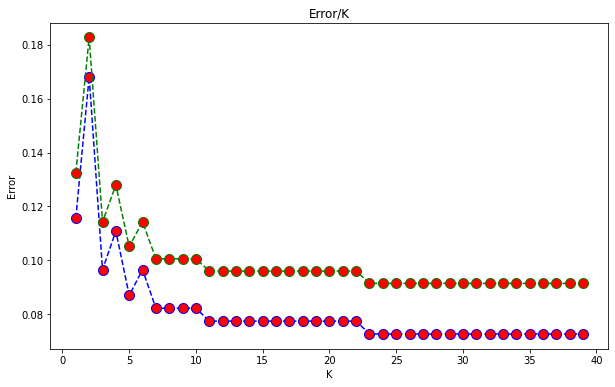

In [11]:
# Aplicación de cambios en X_test
# 1- Eliminación de columnas
# 2- Escalado de valores
X_test=X_test[X_test.columns[2:]]
X_test=minmaxSc.transform(X_test)

# Iteración entre numeros de k
error_rate = []
error_rate_train=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # Media de la evaluación booleana entre prediccion y test
    # ej: np.mean([True, False, True]) = 0.6
    error_rate.append(np.mean(pred_i != y_test.to_numpy()))
    error_rate_train.append(np.mean(pred_i != y_train.to_numpy()))

# Ploteo de los resultados
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,40),error_rate_train,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.title('Error/K')
plt.xlabel('K')
plt.ylabel('Error')

print("Error minimo:-",min(error_rate),"con K =",error_rate.index(min(error_rate)))

plt.show()